In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# grab data set from url *multipul updates each day make sure we are on current tab....

cv_data = pd.read_html('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?usp=sharing&sle=true#')

In [4]:
#combine all tabs from data set
cv_data =pd.concat(cv_data)
cv_data

/Users/jordanpatton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,E,F,G,H,I,Unnamed: 0
0,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,NaN,NaN,NaN,1
1,Hubei,Mainland China,2/6/20 23:23,22112,618,817,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/6/20 12:43,970,0,69,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/6/20 10:53,954,0,94,NaN,NaN,NaN,4
4,Henan,Mainland China,2/6/20 11:23,851,2,56,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [5]:

#remove Strings from 1st row
cv_data.drop([0], inplace=True)
cv_data

,A,B,C,D,E,F,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/6/20 23:23,22112,618,817,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/6/20 12:43,970,0,69,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/6/20 10:53,954,0,94,NaN,NaN,NaN,4
4,Henan,Mainland China,2/6/20 11:23,851,2,56,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/6/20 13:13,711,0,81,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [6]:
#drop "Unnamed:0"

#cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=True)

#cv_data

#rename columns in dataframe

cv_data = cv_data.rename(columns={
    'A':'Province/State',
    'B':'Country/Region',
    'C':'Last_Update',
    'D':'Infected',
    'E':'Deaths',
    'F':'Recovered',
    
})

In [7]:
cv_data.head()

,Province/State,Country/Region,Last_Update,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/6/20 23:23,22112,618,817,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/6/20 12:43,970,0,69,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/6/20 10:53,954,0,94,NaN,NaN,NaN,4
4,Henan,Mainland China,2/6/20 11:23,851,2,56,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/6/20 13:13,711,0,81,NaN,NaN,NaN,6


In [8]:
#set index

cv_data =cv_data.set_index('Last_Update')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
Last_Update,,,,,,,,,
2/6/20 23:23,Hubei,Mainland China,22112,618,817,NaN,NaN,NaN,2
2/6/20 12:43,Guangdong,Mainland China,970,0,69,NaN,NaN,NaN,3
2/6/20 10:53,Zhejiang,Mainland China,954,0,94,NaN,NaN,NaN,4
2/6/20 11:23,Henan,Mainland China,851,2,56,NaN,NaN,NaN,5
2/6/20 13:13,Hunan,Mainland China,711,0,81,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN,NaN,NaN,NaN,24
1/21/2020,NaN,Japan,1,NaN,NaN,NaN,NaN,NaN,25
1/21/2020,NaN,Thailand,2,NaN,NaN,NaN,NaN,NaN,26


In [9]:
#drop "Unnamed:0"

cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=False)




In [10]:
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/6/20 23:23,Hubei,Mainland China,22112,618,817
2/6/20 12:43,Guangdong,Mainland China,970,0,69
2/6/20 10:53,Zhejiang,Mainland China,954,0,94
2/6/20 11:23,Henan,Mainland China,851,2,56
2/6/20 13:13,Hunan,Mainland China,711,0,81
...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN
1/21/2020,NaN,Japan,1,NaN,NaN
1/21/2020,NaN,Thailand,2,NaN,NaN


In [11]:
cv_data.isnull()

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/6/20 23:23,False,False,False,False,False
2/6/20 12:43,False,False,False,False,False
2/6/20 10:53,False,False,False,False,False
2/6/20 11:23,False,False,False,False,False
2/6/20 13:13,False,False,False,False,False
...,...,...,...,...,...
1/21/2020,False,False,True,False,True
1/21/2020,True,False,False,True,True
1/21/2020,True,False,False,True,True


In [12]:
cv_data.dropna(inplace=True)
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/6/20 23:23,Hubei,Mainland China,22112,618,817
2/6/20 12:43,Guangdong,Mainland China,970,0,69
2/6/20 10:53,Zhejiang,Mainland China,954,0,94
2/6/20 11:23,Henan,Mainland China,851,2,56
2/6/20 13:13,Hunan,Mainland China,711,0,81
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [13]:
cv_data.isnull().sum()
cv_data.head()

#cv_data['ratio']= cv_data['Deaths']/ cv_data['Confirmed']

cv_data.dtypes

Province/State    object
Country/Region    object
Infected          object
Deaths            object
Recovered         object
dtype: object

In [14]:
# change types from object to int.
#people_df['Person_ID'] = people_df['Person_ID'].astype('int')

cv_data['Infected'] = cv_data['Infected'].astype('int')
cv_data['Deaths'] = cv_data['Deaths'].astype('int')
cv_data['Recovered'] = cv_data['Recovered'].astype('int')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/6/20 23:23,Hubei,Mainland China,22112,618,817
2/6/20 12:43,Guangdong,Mainland China,970,0,69
2/6/20 10:53,Zhejiang,Mainland China,954,0,94
2/6/20 11:23,Henan,Mainland China,851,2,56
2/6/20 13:13,Hunan,Mainland China,711,0,81
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [15]:
#Find ratio of deaths to confirmed effected

cv_data['death_ratio']= cv_data['Deaths']/ cv_data['Infected']

cv_data['recovered_ratio'] =cv_data['Recovered']/ cv_data['Infected']

In [16]:
cv_data.head()

,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Last_Update,,,,,,,
2/6/20 23:23,Hubei,Mainland China,22112,618,817,0.027949,0.036948
2/6/20 12:43,Guangdong,Mainland China,970,0,69,0.000000,0.071134
2/6/20 10:53,Zhejiang,Mainland China,954,0,94,0.000000,0.098532
2/6/20 11:23,Henan,Mainland China,851,2,56,0.002350,0.065805
2/6/20 13:13,Hunan,Mainland China,711,0,81,0.000000,0.113924


In [17]:
#round decimals .000 
decimals =pd.Series ([3,3], index=['death_ratio', 'recovered_ratio'])
cv_data.round(decimals)

,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Last_Update,,,,,,,
2/6/20 23:23,Hubei,Mainland China,22112,618,817,0.028,0.037
2/6/20 12:43,Guangdong,Mainland China,970,0,69,0.000,0.071
2/6/20 10:53,Zhejiang,Mainland China,954,0,94,0.000,0.099
2/6/20 11:23,Henan,Mainland China,851,2,56,0.002,0.066
2/6/20 13:13,Hunan,Mainland China,711,0,81,0.000,0.114
...,...,...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1,1.800,0.025
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1,2.182,0.030
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1,0.667,0.030


In [18]:
cv_data[['Province/State']].duplicated()

Last_Update
2/6/20 23:23          False
2/6/20 12:43          False
2/6/20 10:53          False
2/6/20 11:23          False
2/6/20 13:13          False
                      ...  
1/25/2020 12:00 PM     True
1/25/2020 12:00 PM     True
1/25/2020 12:00 AM     True
1/24/2020 12:00 PM     True
1/23/20 12:00 PM       True
Length: 696, dtype: bool

In [19]:
#create a for loop to clean up duplicates for each day and get a running total for that days end.
#just use cumprod feature?
cv_data_days= cv_data.drop_duplicates(subset=['Province/State'], inplace=False)

In [20]:
cv_data_days

,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Last_Update,,,,,,,
2/6/20 23:23,Hubei,Mainland China,22112,618,817,0.027949,0.036948
2/6/20 12:43,Guangdong,Mainland China,970,0,69,0.000000,0.071134
2/6/20 10:53,Zhejiang,Mainland China,954,0,94,0.000000,0.098532
2/6/20 11:23,Henan,Mainland China,851,2,56,0.002350,0.065805
2/6/20 13:13,Hunan,Mainland China,711,0,81,0.000000,0.113924
2/6/20 2:33,Jiangxi,Mainland China,600,0,37,0.000000,0.061667
2/6/20 13:33,Anhui,Mainland China,591,0,34,0.000000,0.057530
2/6/20 23:33,Chongqing,Mainland China,411,2,24,0.004866,0.058394
2/6/20 8:03,Jiangsu,Mainland China,373,0,34,0.000000,0.091153


In [21]:
cv_data_days['Deaths'].sum()

635

In [22]:
cv_data_days['Infected'].sum()

30696

In [23]:
cv_data_days['Recovered'].sum()

1492

In [24]:
#add totals of columns together for their individual daily total to be added to df daily
# replace index with date use current 

cv_data_2= cv_data.reset_index()

In [25]:
cv_data_2


,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
0,2/6/20 23:23,Hubei,Mainland China,22112,618,817,0.027949,0.036948
1,2/6/20 12:43,Guangdong,Mainland China,970,0,69,0.000000,0.071134
2,2/6/20 10:53,Zhejiang,Mainland China,954,0,94,0.000000,0.098532
3,2/6/20 11:23,Henan,Mainland China,851,2,56,0.002350,0.065805
4,2/6/20 13:13,Hunan,Mainland China,711,0,81,0.000000,0.113924
...,...,...,...,...,...,...,...,...
691,1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1,1.800000,0.025000
692,1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1,2.181818,0.030303
693,1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1,0.666667,0.030303
694,1/24/2020 12:00 PM,Shanghai,Mainland China,20,22,1,1.100000,0.050000


In [26]:

#add new date column to get rid of time stamp
cv_data_2['Last_Update']= pd.to_datetime(cv_data_2.Last_Update)
cv_data_2['Date']= cv_data_2['Last_Update'].dt.strftime('%m/%d/%Y')
print (cv_data_2)


            Last_Update Province/State  Country/Region  Infected  Deaths  \
0   2020-02-06 23:23:00          Hubei  Mainland China     22112     618   
1   2020-02-06 12:43:00      Guangdong  Mainland China       970       0   
2   2020-02-06 10:53:00       Zhejiang  Mainland China       954       0   
3   2020-02-06 11:23:00          Henan  Mainland China       851       2   
4   2020-02-06 13:13:00          Hunan  Mainland China       711       0   
..                  ...            ...             ...       ...     ...   
691 2020-01-25 12:00:00       Shanghai  Mainland China        40      72   
692 2020-01-25 12:00:00       Shanghai  Mainland China        33      72   
693 2020-01-25 00:00:00       Shanghai  Mainland China        33      22   
694 2020-01-24 12:00:00       Shanghai  Mainland China        20      22   
695 2020-01-23 12:00:00      Guangdong  Mainland China        32       1   

     Recovered  death_ratio  recovered_ratio        Date  
0          817     0.027949 

In [27]:
# Set index as 'Date'
cv_data_2.set_index('Date')

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,,,,
02/06/2020,2020-02-06 23:23:00,Hubei,Mainland China,22112,618,817,0.027949,0.036948
02/06/2020,2020-02-06 12:43:00,Guangdong,Mainland China,970,0,69,0.000000,0.071134
02/06/2020,2020-02-06 10:53:00,Zhejiang,Mainland China,954,0,94,0.000000,0.098532
02/06/2020,2020-02-06 11:23:00,Henan,Mainland China,851,2,56,0.002350,0.065805
02/06/2020,2020-02-06 13:13:00,Hunan,Mainland China,711,0,81,0.000000,0.113924
...,...,...,...,...,...,...,...,...
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,1.800000,0.025000
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,33,72,1,2.181818,0.030303
01/25/2020,2020-01-25 00:00:00,Shanghai,Mainland China,33,22,1,0.666667,0.030303


In [28]:
cv_data_2.drop(columns=['Last_Update'])

,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio,Date
0,Hubei,Mainland China,22112,618,817,0.027949,0.036948,02/06/2020
1,Guangdong,Mainland China,970,0,69,0.000000,0.071134,02/06/2020
2,Zhejiang,Mainland China,954,0,94,0.000000,0.098532,02/06/2020
3,Henan,Mainland China,851,2,56,0.002350,0.065805,02/06/2020
4,Hunan,Mainland China,711,0,81,0.000000,0.113924,02/06/2020
...,...,...,...,...,...,...,...,...
691,Shanghai,Mainland China,40,72,1,1.800000,0.025000,01/25/2020
692,Shanghai,Mainland China,33,72,1,2.181818,0.030303,01/25/2020
693,Shanghai,Mainland China,33,22,1,0.666667,0.030303,01/25/2020
694,Shanghai,Mainland China,20,22,1,1.100000,0.050000,01/24/2020


In [30]:
#drop duplicates in order to get the last value for the day
cv_data_2.drop_duplicates(subset=['Province/State', "Date"], inplace=True)
cv_data_2

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio,Date
0,2020-02-06 23:23:00,Hubei,Mainland China,22112,618,817,0.027949,0.036948,02/06/2020
1,2020-02-06 12:43:00,Guangdong,Mainland China,970,0,69,0.000000,0.071134,02/06/2020
2,2020-02-06 10:53:00,Zhejiang,Mainland China,954,0,94,0.000000,0.098532,02/06/2020
3,2020-02-06 11:23:00,Henan,Mainland China,851,2,56,0.002350,0.065805,02/06/2020
4,2020-02-06 13:13:00,Hunan,Mainland China,711,0,81,0.000000,0.113924,02/06/2020
...,...,...,...,...,...,...,...,...,...
687,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,0.053408,0.030921,01/26/2020
688,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,0.018868,0.018868,01/26/2020
691,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,1.800000,0.025000,01/25/2020
694,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,1.100000,0.050000,01/24/2020


In [31]:
#create new data frame extracting only mainland China info
cv_data_china=cv_data_2.loc[cv_data_2['Country/Region']=='Mainland China']
cv_data_china

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio,Date
0,2020-02-06 23:23:00,Hubei,Mainland China,22112,618,817,0.027949,0.036948,02/06/2020
1,2020-02-06 12:43:00,Guangdong,Mainland China,970,0,69,0.000000,0.071134,02/06/2020
2,2020-02-06 10:53:00,Zhejiang,Mainland China,954,0,94,0.000000,0.098532,02/06/2020
3,2020-02-06 11:23:00,Henan,Mainland China,851,2,56,0.002350,0.065805,02/06/2020
4,2020-02-06 13:13:00,Hunan,Mainland China,711,0,81,0.000000,0.113924,02/06/2020
...,...,...,...,...,...,...,...,...,...
687,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,0.053408,0.030921,01/26/2020
688,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,0.018868,0.018868,01/26/2020
691,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,1.800000,0.025000,01/25/2020
694,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,1.100000,0.050000,01/24/2020


In [33]:
#Group by 'Date' in order to sum all
all_sum_cv = cv_data_china.groupby('Date').sum()
all_sum_cv

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,
01/23/2020,32,1,2,0.031250,0.062500
01/24/2020,20,22,1,1.100000,0.050000
01/25/2020,40,72,1,1.800000,0.025000
01/26/2020,1476,77,45,0.072276,0.049789
01/27/2020,2860,102,52,0.064497,0.087772
01/28/2020,3931,129,89,0.068369,0.121320
01/29/2020,5261,168,103,0.091727,0.142658
01/30/2020,6634,210,135,0.082545,0.165787
01/31/2020,6691,210,162,0.080300,0.229292


In [34]:
all_sum_cv.reset_index(inplace=True)

In [35]:
all_sum_cv.dtypes

Date                object
Infected             int64
Deaths               int64
Recovered            int64
death_ratio        float64
recovered_ratio    float64
dtype: object

In [40]:
all_sum_cv.set_index('Date')

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,
01/23/2020,32,1,2,0.031250,0.062500
01/24/2020,20,22,1,1.100000,0.050000
01/25/2020,40,72,1,1.800000,0.025000
01/26/2020,1476,77,45,0.072276,0.049789
01/27/2020,2860,102,52,0.064497,0.087772
01/28/2020,3931,129,89,0.068369,0.121320
01/29/2020,5261,168,103,0.091727,0.142658
01/30/2020,6634,210,135,0.082545,0.165787
01/31/2020,6691,210,162,0.080300,0.229292


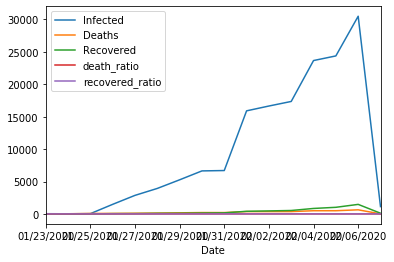

In [39]:
all_sum_cv.set_index('Date').plot()

In [58]:
##Monte Carlo Simulation on Corona Virus

In [42]:
infection_change = all_sum.pct_change()
infection_change.head()

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,
01/23/2020,NaN,NaN,NaN,NaN,NaN
01/24/2020,-0.375000,21.000000,-0.500000,34.200000,-0.200000
01/25/2020,1.000000,2.272727,0.000000,0.636364,-0.500000
01/26/2020,35.900000,0.069444,44.000000,-0.959847,0.991541
01/27/2020,0.937669,0.324675,0.155556,-0.107625,0.762900


In [44]:
# Calcualte average daily return of infection/Death/and Recovered?
avg_infected_return = infection_change.mean()['Infected']
avg_death_return = infection_change.mean()['Deaths']
avg_recovered_return = infection_change.mean()['Recovered']

In [46]:
#Calculate the STD of Infection_change
std_infected = infection_change.std()['Infected']
std_deaths = infection_change.std()['Deaths']
std_recovered = infection_change.std()['Recovered']

In [41]:
# Save the last days total
Infected_monte =all_sum['Infected'][-1]
Deaths_monte =all_sum['Deaths'][-1]
Recovered_monte =all_sum['Recovered'][-1]

In [55]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 30
monte_carlo = pd.DataFrame()
CV_cumulative_returns = pd.DataFrame()

In [56]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    #simulated_ashr_prices = [ashr_last_price]
    simulated_infected = [Infected_monte]
    simulated_deaths = [Deaths_monte]
    simulated_recovered = [Recovered_monte]
    for y in range (number_records):
        #simulated_ashr_price = simulated_ashr_prices[-1] * (1 + np.random.normal(avg_daily_returns_ashr, std_daily_returns_ashr))
        growth_infected = simulated_infected[-1] * (1 + np.random.normal(avg_infected_return, std_infected))
        growth_deaths = simulated_deaths[-1] * (1 + np.random.normal(avg_death_return, std_deaths))
        growth_recovered = simulated_recovered[-1] * (1 + np.random.normal(avg_recovered_return, std_recovered))
       
        #simulated_ashr_prices.append(simulated_ashr_price)
        simulated_infected.append(growth_infected)
        simulated_deaths.append(growth_deaths)
        simulated_recovered.append(growth_recovered)
    
    #monte_carlo['ASHR prices'] = pd.Series(simulated_ashr_prices)
    monte_carlo['Infected'] = pd.Series(simulated_infected)
    monte_carlo['Deaths'] = pd.Series(simulated_deaths)
    monte_carlo['Recovered'] = pd.Series(simulated_recovered)
    
    simulated_CV_return = monte_carlo.pct_change()
    
    weights = [(0.2), (0.2), (0.2), (0.2), (0.2)]
    Infected_daily_growth = infection_change.dot(weights)
    
    CV_cumulative_returns[x] = ((1 + Infected_daily_growth.fillna(0)).cumprod()-1)
CV_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Date,,,,,,,,,,,,,,,,,,,,,
01/23/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01/24/2020,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,...,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000,10.825000
01/25/2020,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,...,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500,18.887500
01/26/2020,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,...,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028,337.092028
01/27/2020,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,...,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823,477.276823


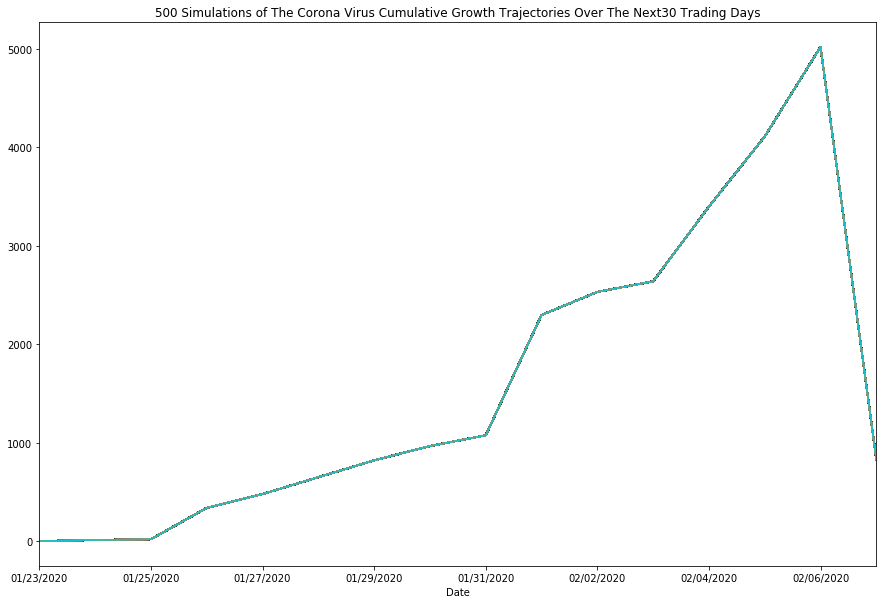

In [57]:
#Visualize the Simulation

plot_title = f'{number_simulations} Simulations of The Corona Virus Cumulative Growth Trajectories Over The Next{number_records} Trading Days'
CV_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))